<a href="https://colab.research.google.com/github/diviramon/NBA-Rookie-Analytics/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
This notebook was used to preprocess the data as well as analyze the correlation of the features
'''

In [ ]:
# library used for data manipulation
import pandas as pd
# original dataset from https://www.kaggle.com/drgilermo/nba-players-stats
raw_data = pd.read_csv('Seasons_Stats.csv')

In [ ]:
# produces seasons and career data sets
def calculate_cluster_data():
    # read original dataset
    df = pd.read_csv('Seasons_Stats.csv')
    # drop seasons before 1982
    df = df.drop(df[df.Year < 1982.0].index)
    # drop entries that have nothing for Player column
    df = df.dropna(axis=0, subset=['Player'])
    # remove asterisks from player names
    df['Player'] = df['Player'].map(lambda x: x.lstrip('*').rstrip('*'))
    # apply per_game_averages aggregate function to produce seasons
    df = df.groupby(['Player', 'Year']).apply(per_game_averages).reset_index(drop=True)
    df.to_csv('seasons.csv')
    
    # load seasons
    df = pd.read_csv('seasons.csv')
    # drop the year column
    df.drop(['Year'], axis =1, inplace=True)
    # drop all rows that have null entries
    df = df.dropna()
    # rename columns
    df = df.rename(columns={'Player': 'PLAYER', 'Tm' : 'TEAM', 'Pos': 'POSITION'})
    # preserve player, team and name in a different datastructure
    df2 = df[['PLAYER','TEAM', 'POSITION']].copy()
    df2 = df2.drop_duplicates(subset=['PLAYER'],keep='first')
    df = df.groupby('PLAYER').apply(career_stats).reset_index(drop=True)
    # merge with team and position
    df = pd.merge(df,df2,on='PLAYER')
    # drop all rows with null entries
    df = df.dropna()
    # save as csv
    df.to_csv('career.csv')

def career_stats(seasons):
    if len(seasons) >= 10:
        df = seasons.mean()
        data = {
        'PPG': df['PPG'],      
        'APG': df['APG'],
        'SPG': df['SPG'],
        'BPG': df['BPG'],
        'FTPG': df['FTPG'],
        'FTAPG': df['FTAPG'],
        '3PPG': df['3PPG'],
        '3PAPG': df['3PAPG'],
        'MPG': df['MPG'],
        '2PPG': df['2PPG'],
        '2PAPG': df['2PAPG'],
        'FGPG': df['FGPG'],
        'FGAPG': df['FGAPG'],
        'PFPG': df['PFPG'],
        'ORBPG': df['ORBPG'],
        'DRBPG': df['DRBPG'],
        'TRBPG': df['TRBPG'],
        'TOVPG': df['TOVPG'],
        'PER': df['PER'],
        'TS%': df['TS%'],
        '3PAr': df['3PAr'],
        'FTr': df['FTr'],
        'ORB%': df['ORB%'],
        'DRB%': df['DRB%'],
        'TRB%': df['TRB%'],
        'AST%': df['AST%'],
        'STL%': df['STL%'],
        'BLK%': df['BLK%'],
        'TOV%': df['TOV%'],
        'USG%': df['USG%'],
        'OWS': df['OWS'],
        'DWS': df['DWS'],
        'WS': df['WS'],
        'WS/48': df['WS/48'],
        'OBPM': df['OBPM'],
        'DBPM': df['DBPM'],
        'BPM': df['BPM'],
        'VORP': df['VORP'],
        'FG%': df['FG%'],
        '3P%': df['3P%'],
        '2P%': df['2P%'],
        'eFG%': df['eFG%'],
        'FT%': df['FT%'],
        'PLAYER': seasons.iloc[0].PLAYER,
        }
        return pd.Series(data)
    data = {
    'PPG': None,      
    'APG': None,
    'SPG': None,
    'BPG': None,
    'FTPG': None,
    'FTAPG': None,
    '3PPG': None,
    '3PAPG': None,
    'MPG': None,
    '2PPG': None,
    '2PAPG': None,
    'FGPG': None,
    'FGAPG': None,
    'PFPG': None,
    'ORBPG': None,
    'DRBPG': None,
    'TRBPG': None,
    'TOVPG': None,
    'PER': None,
    'TS%': None,
    '3PAr': None,
    'FTr': None,
    'ORB%': None,
    'DRB%': None,
    'TRB%': None,
    'AST%': None,
    'STL%': None,
    'BLK%': None,
    'TOV%': None,
    'USG%': None,
    'OWS': None,
    'DWS': None,
    'WS': None,
    'WS/48': None,
    'OBPM': None,
    'DBPM': None,
    'BPM': None,
    'VORP': None,
    'FG%': None,
    '3P%': None,
    '2P%': None,
    'eFG%': None,
    'FT%': None,
    'PLAYER': seasons.iloc[0].PLAYER,
    }
    return pd.Series(data)

def per_game_averages(season):
    season_stats = season.iloc[0]
    data = {
        # Play Time
        'MPG': season_stats['MP'] / season_stats['G'], # Minutes per game
        'USG%': season_stats['USG%'],
        # Offensive Stats
        'PPG': season_stats['PTS'] / season_stats['G'], # Points per game
        'APG': season_stats['AST'] / season_stats['G'], # Assists per game
        'AST%': season_stats['AST%'],
        '2PPG': season_stats['2P'] / season_stats['G'], # 2 points per game
        '2PAPG': season_stats['2PA'] / season_stats['G'], # 2 points attempt per game
        '2P%': season_stats['2P%'],
        '3PPG': season_stats['3P'] / season_stats['G'], # 3 points per game
        '3PAPG': season_stats['3PA'] / season_stats['G'], # 3 points attempt per game
        '3P%': season_stats['3P%'],
        'FGPG': season_stats['FG'] / season_stats['G'], # Field goals per game
        'FGAPG': season_stats['FGA'] / season_stats['G'], # Field goal attempts per game
        'FG%': season_stats['FG%'],
        'eFG%': season_stats['eFG%'],
        'FTPG': season_stats['FT'] / season_stats['G'], # Free throws per game
        'FTAPG': season_stats['FTA'] / season_stats['G'], # Free throw attempts per game
        'FT%': season_stats['FT%'],
        '3PAr': season_stats['3PAr'],
        'FTr': season_stats['FTr'],
        # Defensive Stats
        'SPG': season_stats['STL'] / season_stats['G'], # Steals per game
        'STL%': season_stats['STL%'],
        'BPG': season_stats['BLK'] / season_stats['G'], # Blocks per game
        'BLK%': season_stats['BLK%'],
        'PFPG': season_stats['PF'] / season_stats['G'], # Personal fouls per game
        'ORBPG': season_stats['ORB'] / season_stats['G'],  # Offensive rebounds per game
        'ORB%': season_stats['ORB%'],
        'DRBPG': season_stats['DRB'] / season_stats['G'], # Defensive rebounds per game
        'DRB%': season_stats["DRB%"],
        'TRBPG': season_stats['TRB'] / season_stats['G'], # Total rebounds per game
        'TRB%': season_stats['TRB%'],
        'TOVPG': season_stats['TOV'] / season_stats['G'], # Turnovers per game
        'TOV%': season_stats['TOV%'],
        'PER': season_stats['PER'],
        'TS%': season_stats['TS%'],  
        # Advanced stats
        'OWS': season_stats['OWS'],
        'DWS': season_stats['DWS'],
        'WS': season_stats['WS'],
        'WS/48': season_stats['WS/48'],
        'OBPM': season_stats['OBPM'],
        'DBPM': season_stats['DBPM'],
        'BPM': season_stats['BPM'],
        'VORP': season_stats['VORP'],
        'Player': season_stats['Player'],
        'Year': season_stats['Year'],
        'Pos': season_stats['Pos'],
        'Tm': season_stats['Tm']
    } 
    return pd.Series(data)

In [ ]:
# library for producing plots and graphs
import matplotlib.pyplot as plt
# opensource library https://pypi.org/project/heatmapz for correlation matrices
# have to pip install package to use
from heatmap import heatmap, corrplot

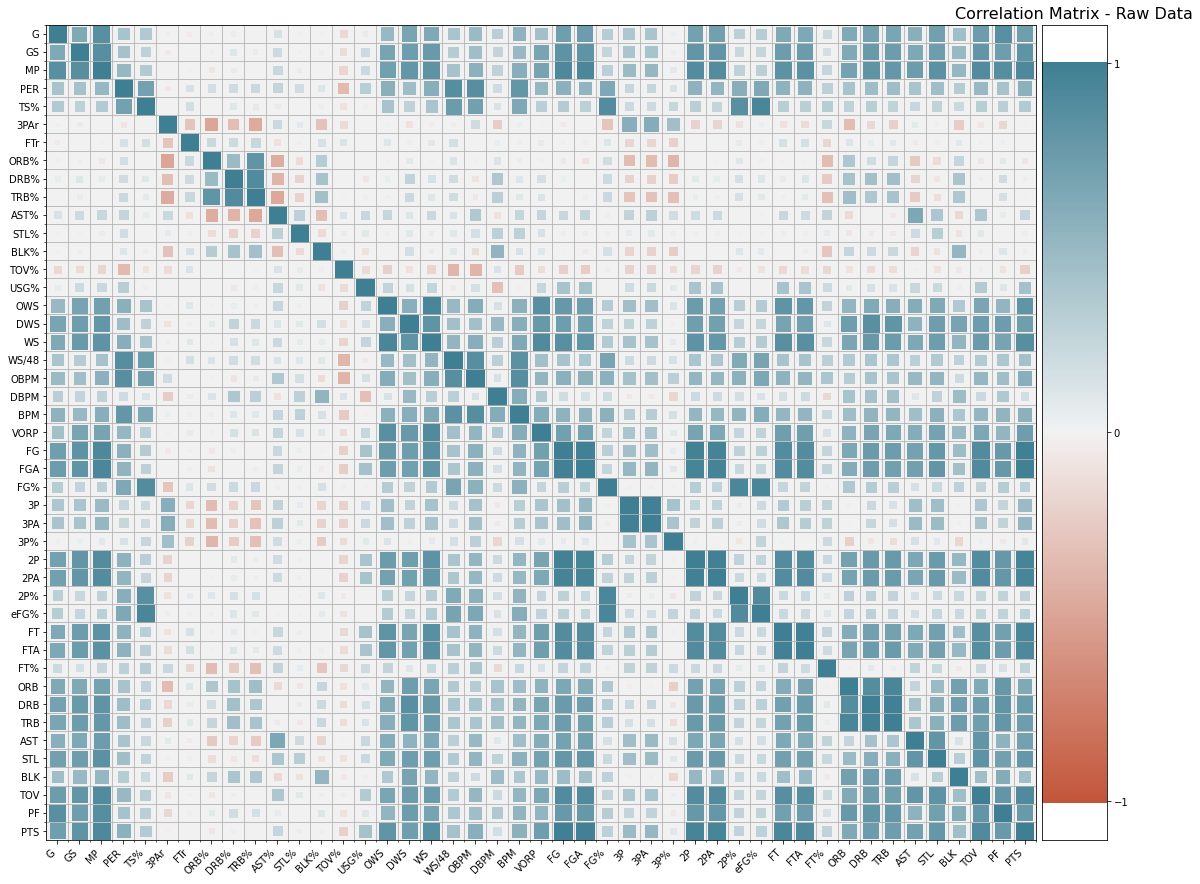

In [ ]:
# drop unnessacary columns
features = raw_data.drop(columns=['blank2', 'blanl', 'Unnamed: 0', 'Tm', 'Age', 'Pos', 'Player', 'Year'])

# plot and save correlation matrix
fig = plt.figure(figsize=(19, 15))
corrplot(features.corr(), size_scale=300)
plt.title('Correlation Matrix - Raw Data', fontsize=16)
fig.savefig('raw_data_correlation.png')

In [ ]:
# custom library at transform.py
from transform import calculate_cluster_data
# method creates two csv files -> seasons.csv and careers.csv
calculate_cluster_data()

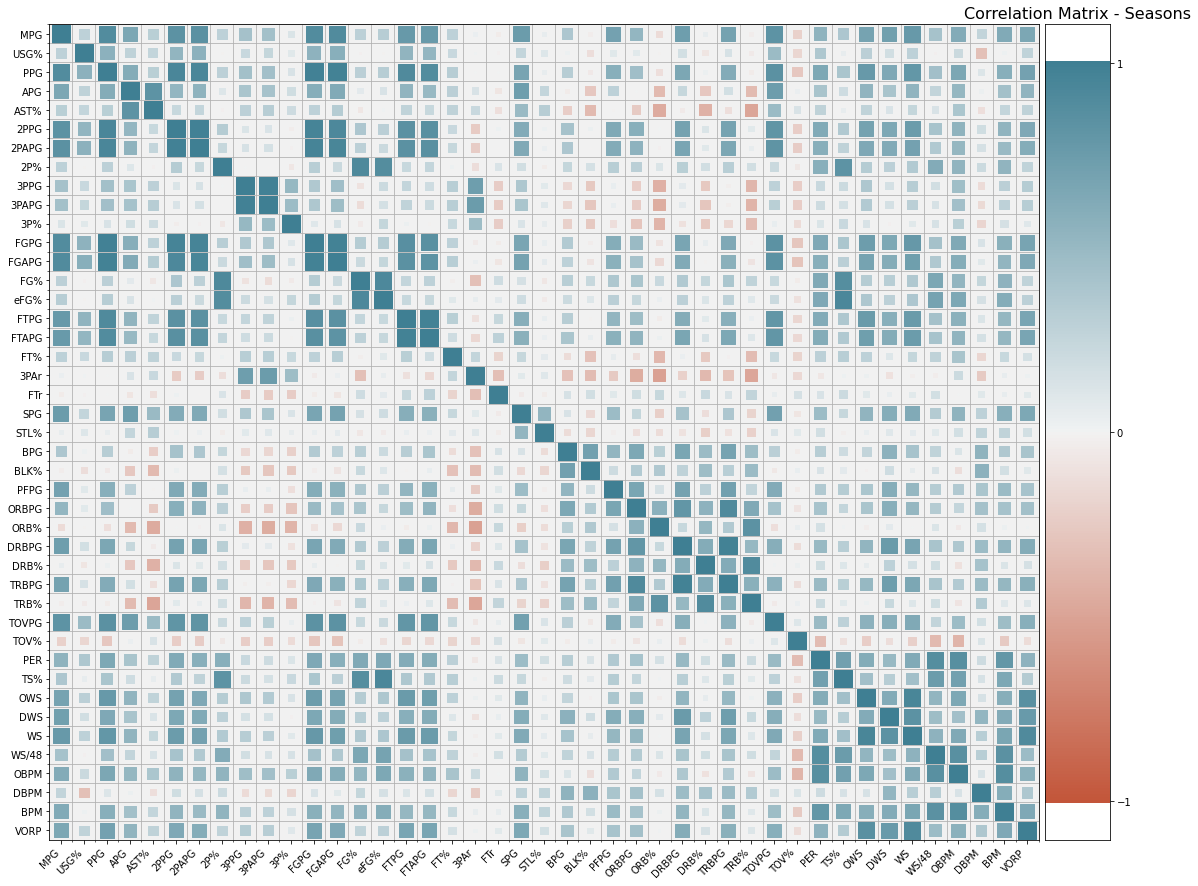

In [ ]:
# load seasons
seasons = pd.read_csv('seasons.csv')
# drop unnessacary columns
features = seasons.drop(columns=['Unnamed: 0','Player','Year', 'Pos', 'Tm'])

# plot and save correlation matrix
fig = plt.figure(figsize=(19, 15))
corrplot(features.corr(), size_scale=300)
plt.title('Correlation Matrix - Seasons', fontsize=16)
fig.savefig('seasons_correlation.png')

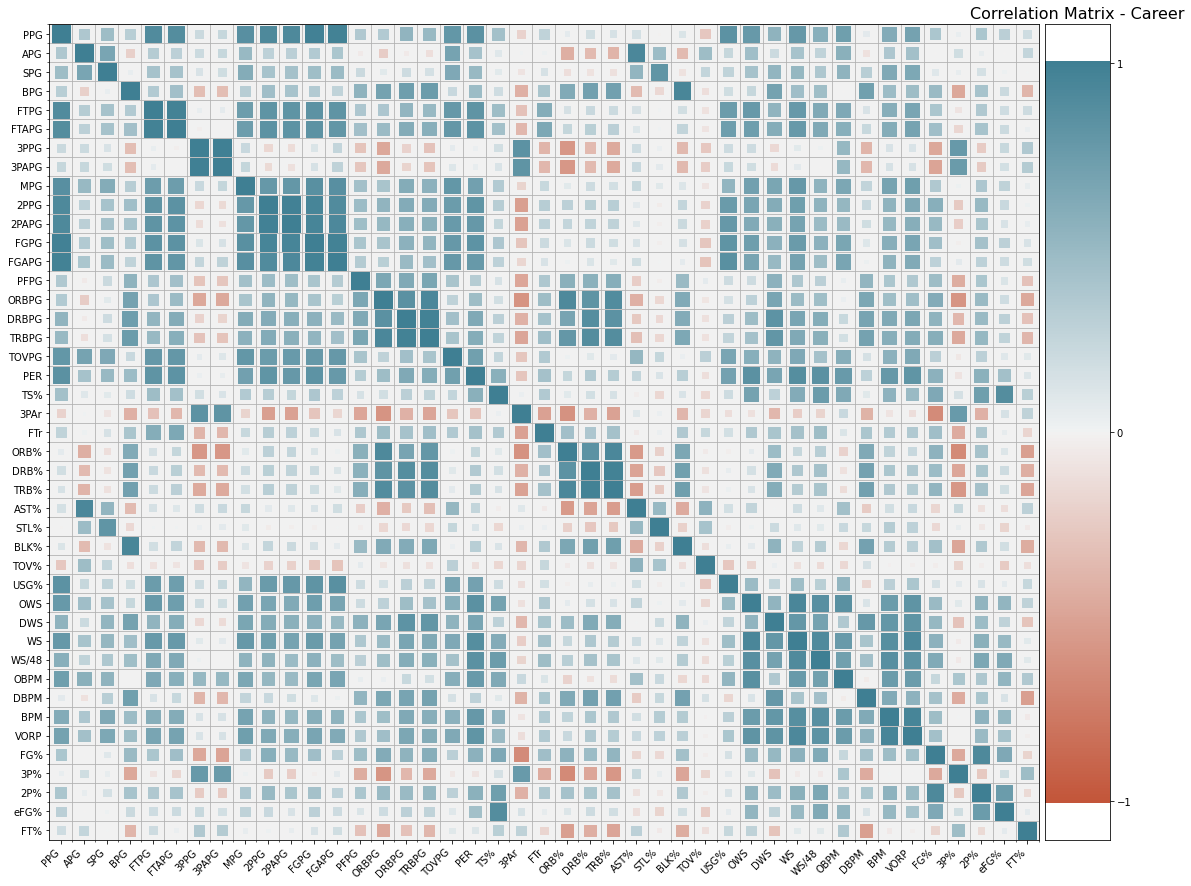

In [ ]:
# load careers.csv
careers = pd.read_csv('career.csv')

# drop unnessacary columns
features = careers.drop(columns=['Unnamed: 0', 'PLAYER', 'TEAM', 'POSITION'])

# plot and save correlation matrix
fig = plt.figure(figsize=(19, 15))
corrplot(features.corr(), size_scale=300)
plt.title('Correlation Matrix - Career', fontsize=16)
fig.savefig('career_correlation.png')

In [ ]:
# this section was run after running the code that generates 'two_season_complete.csv' in supervised.ipynb
# it is important to note that the features remain the same accross all four cases, the output is what changes

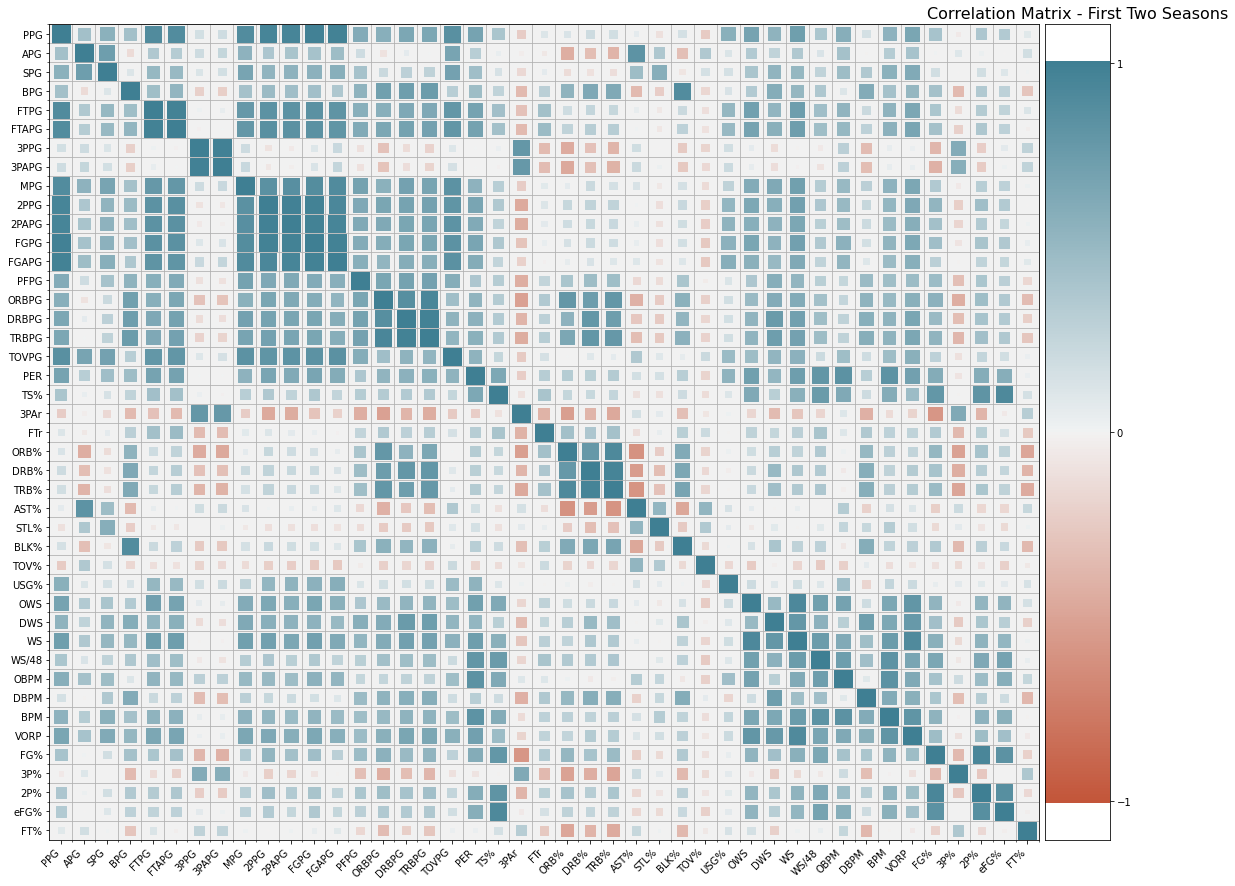

In [ ]:
# read data set
first_two_seasons = pd.read_csv('two_season_complete.csv')

# drop unnessacary columns - CLUSTER was dropped here as it is the output results (from clustering)
features = first_two_seasons.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','PLAYER', 'CLUSTER'])

# plot and save correlation matrix
fig = plt.figure(figsize=(19, 15))
corrplot(features.corr(), size_scale=300)
plt.title('Correlation Matrix - First Two Seasons', fontsize=16)
fig.savefig('first_two_seasons_correlation.png')

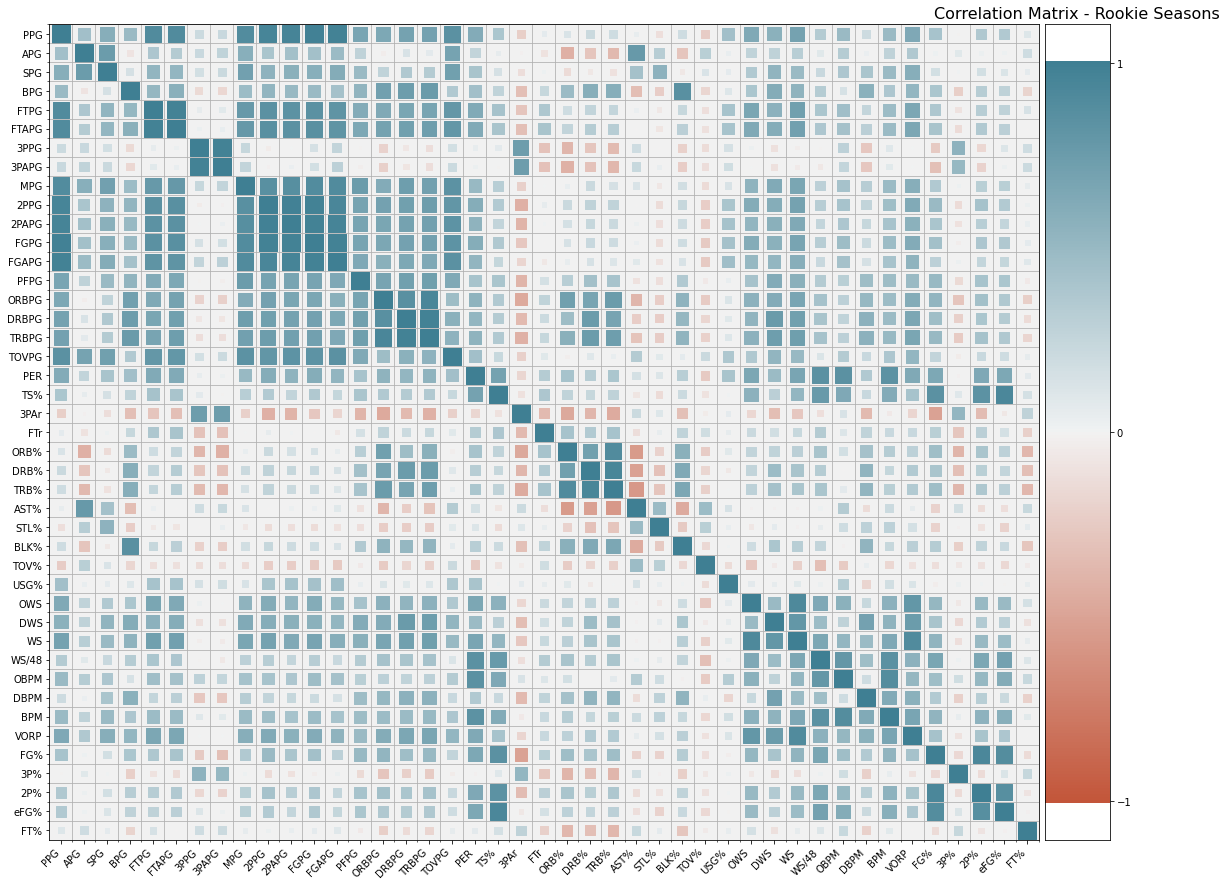

In [ ]:
# read data set
data = pd.read_csv('first_season_complete.csv')

# drop unnessacary columns - CLUSTER was dropped here as it is the output results (from clustering)
features = data.drop(columns=['Unnamed: 0', 'Unnamed: 0_x','Unnamed: 0_y', 'PLAYER', 'Year', 'Pos', 'Tm', 'CLUSTER'])

# plot and save correlation matrix
fig = plt.figure(figsize=(19, 15))
corrplot(features.corr(), size_scale=300)
plt.title('Correlation Matrix - Rookie Seasons', fontsize=16)
fig.savefig('rookie_season_correlation.png')